In [74]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import re
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [114]:
top1_df = pd.read_json('/content/drive/MyDrive/MADE/3_полугодие_MADE/hpc/task1/top500.json', orient='index')

In [115]:
top1_df.head()

,Sum,#1,#500
1993-06-01,"[1100.0, GFlop/s]","[59.7, GFlop/s]","[0.4, GFlop/s]"
1993-11-01,"[1500.0, GFlop/s]","[124.0, GFlop/s]","[0.5, GFlop/s]"
1994-06-01,"[2300.0, GFlop/s]","[143.4, GFlop/s]","[0.8, GFlop/s]"
1994-11-01,"[2700.0, GFlop/s]","[170.0, GFlop/s]","[1.2, GFlop/s]"
1995-06-01,"[3900.0, GFlop/s]","[170.0, GFlop/s]","[2.0, GFlop/s]"


In [116]:
top1_df = top1_df.reset_index()

In [117]:
top1_df['Sum'] = top1_df['Sum'].apply(lambda x: x[0])
top1_df['#1'] = top1_df['#1'].apply(lambda x: x[0])
top1_df['#500'] = top1_df['#500'].apply(lambda x: x[0])

In [118]:
top1_df.dtypes

index    datetime64[ns]
Sum             float64
#1              float64
#500            float64
dtype: object

In [119]:
x_train, y_train = np.array(top1_df.index).reshape(-1, 1), np.log(top1_df['#1'].values)
model = linear_model.Ridge(fit_intercept=True).fit(x_train, y_train)
dates_to_pred = ['2022-11-01', '2023-06-01', '2023-11-01',
                 '2024-06-01', '2024-11-01', '2025-06-01']
x_test = np.arange(x_train[-1][-1] + 1, x_train[-1][-1] + 1 + len(dates_to_pred)).reshape(-1, 1)
y_test = model.predict(x_test)

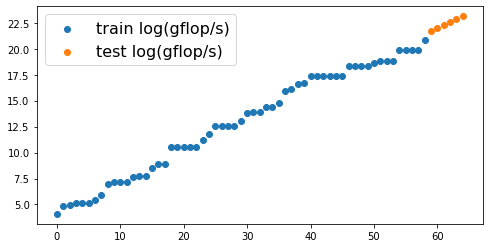

Top 1 performance in 2025-06-01: 11.069730172163398 exaflops/s


In [121]:
figsize = (8,4)
legend_fontsize = 16

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(x_train, y_train, label='train log(gflop/s)')
ax.scatter(x_test, y_test, label='test log(gflop/s)')
ax.legend(fontsize=legend_fontsize)
plt.show()

print("Top 1 performance in 2025-06-01: {} exaflops/s".format(np.exp(y_test[-1]) / 10 ** 9))

### 2. Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [122]:
total_electricity = 28214.07

In [124]:
top500_df = pd.read_excel("/content/drive/MyDrive/MADE/3_полугодие_MADE/hpc/task1/TOP500_202206.xlsx")

In [131]:
nan_cnt = top500_df["Power (kW)"].isna().sum()
avg_val = top500_df["Power (kW)"].sum() / (500 - nan_cnt)
top500_sum = top500_df["Power (kW)"].sum() + avg_val * nan_cnt

In [137]:
 print("{:0.10f} percent of all electricity produced on Earth is consumed by all computers from the top500".format(top500_sum / 10 ** 9 / 28214.07 * 100))

0.0000031592 percent of all electricity produced on Earth is consumed by all computers from the top500
